In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

rows = [
    ("ecommerce","refund_request","User: I received the wrong item. Agent: I’m sorry. Could you share your order ID? User: It's #45912. Agent: I'll process the refund."),
    ("ecommerce","order_tracking","User: Where is my order? It shows shipped. Agent: Please share your order number. User: #78322. Agent: It's arriving tomorrow."),
    ("ecommerce","product_question","User: Does this come in size M? Agent: Yes, we have sizes S to XL."),
    ("banking","balance_check","User: What is my account balance? Agent: Your balance is $1,204.50."),
    ("banking","card_block","User: My card was stolen. Please block it. Agent: Done. We have blocked your card."),
    ("banking","loan_query","User: How do I apply for a personal loan? Agent: You can apply online and upload required docs."),
    ("healthcare","appointment_booking","User: I need an appointment for Monday. Agent: We have a 10am slot on Monday, shall I book?"),
    ("healthcare","prescription_refill","User: I need a refill for my prescription. Agent: Please confirm the medicine name and dosage."),
    ("travel","flight_booking","User: I want to book a flight to Delhi. Agent: What dates do you prefer?"),
    ("travel","cancellation","User: I need to cancel my flight. Agent: I can help with that; what's your booking id?"),
    ("travel","delay_complaint","User: My flight was delayed by 8 hours. Agent: I apologize; we will file a report."),
    ("ecommerce","refund_request","User: I received the wrong item. Agent: I'm sorry. Could you share your order ID? User: It's #45912. Agent: I'll process the refund."),
    ("ecommerce","refund_request","User: This product is damaged. Agent: I apologize for the inconvenience. What's your order number? User: #12847. Agent: Refund initiated."),
    ("ecommerce","refund_request","User: I want to return this item. Agent: May I know the reason? User: It doesn't fit. Order #56234. Agent: Return label sent to your email."),
    ("ecommerce","refund_request","User: The color is different from the picture. Agent: I understand. Please provide your order ID. User: #98172. Agent: Full refund approved."),
    ("ecommerce","refund_request","User: I received a defective product. Agent: Sorry about that. Order number? User: #34521. Agent: We'll process a replacement or refund."),
    ("ecommerce","refund_request","User: This isn't what I ordered. Agent: Let me help. What's your order ID? User: #67890. Agent: Refund will reflect in 3-5 days."),
    ("ecommerce","order_tracking","User: Where is my order? It shows shipped. Agent: Please share your order number. User: #78322. Agent: It's arriving tomorrow."),
    ("ecommerce","order_tracking","User: My package hasn't arrived yet. Agent: Let me check. Order number? User: #45123. Agent: It's currently in transit, expected by Friday."),
    ("ecommerce","order_tracking","User: Can you track my order? Agent: Sure. What's the order ID? User: #89456. Agent: It's out for delivery today."),
    ("ecommerce","order_tracking","User: Status shows processing for 5 days. Agent: Let me investigate. Order number? User: #23674. Agent: There's a delay, should ship tomorrow."),
    ("ecommerce","order_tracking","User: When will my order arrive? Agent: Please provide your order number. User: #56789. Agent: Estimated delivery is November 8th."),
    ("ecommerce","order_tracking","User: Tracking says delivered but I didn't receive it. Agent: That's concerning. Order ID? User: #91234. Agent: I'll open an investigation immediately."),

    ("ecommerce","product_question","User: Does this come in size M? Agent: Yes, we have sizes S to XL."),
    ("ecommerce","product_question","User: What material is this shirt made of? Agent: It's 100% cotton with breathable fabric."),
    ("ecommerce","product_question","User: Is this item waterproof? Agent: Yes, it has an IPX7 waterproof rating."),
    ("ecommerce","product_question","User: Do you have this in blue? Agent: Yes, available in blue, red, and black."),
    ("ecommerce","product_question","User: What's the warranty period? Agent: This product comes with a 2-year manufacturer warranty."),
    ("ecommerce","product_question","User: Is this compatible with iPhone 14? Agent: Yes, it works with iPhone 12 and later models."),
    ("ecommerce","product_question","User: How much does it weigh? Agent: The product weighs approximately 500 grams."),

    ("ecommerce","payment_issue","User: My payment failed but money was deducted. Agent: I apologize. What's your transaction ID? User: TXN78234. Agent: I'll initiate a refund within 24 hours."),
    ("ecommerce","payment_issue","User: Can I pay with multiple cards? Agent: Yes, you can split payment between two cards during checkout."),
    ("ecommerce","payment_issue","User: Do you accept PayPal? Agent: Yes, we accept PayPal, credit cards, and UPI."),
    ("ecommerce","payment_issue","User: I was charged twice for one order. Agent: Let me check. Order number? User: #45231. Agent: I see the duplicate charge, refunding immediately."),
    ("ecommerce","payment_issue","User: Can I use my gift card with a promo code? Agent: Yes, you can apply both during checkout."),

    ("ecommerce","delivery_issue","User: I need to change my delivery address. Agent: What's your order number? User: #34567. Agent: Updated to the new address."),
    ("ecommerce","delivery_issue","User: Can I reschedule my delivery? Agent: Sure. Preferred date? User: November 10th. Order #78234. Agent: Rescheduled successfully."),
    ("ecommerce","delivery_issue","User: The delivery person never showed up. Agent: I apologize. Order ID? User: #56123. Agent: We'll prioritize delivery for tomorrow."),
    ("ecommerce","delivery_issue","User: I need faster shipping. Agent: We can upgrade to express. Order number? User: #91234. Agent: Upgraded, arriving in 1 day."),
    ("ecommerce","delivery_issue","User: Package left outside in rain. Agent: I'm sorry. Was the item damaged? User: Yes, order #67234. Agent: Sending a replacement immediately."),

    ("ecommerce","account_issue","User: I can't log into my account. Agent: Let me help. What's your registered email? User: john@email.com. Agent: Password reset link sent."),
    ("ecommerce","account_issue","User: How do I update my phone number? Agent: Go to Account Settings > Profile > Edit Phone Number."),
    ("ecommerce","account_issue","User: I didn't receive the verification code. Agent: Let me resend it. Confirm your number? User: +91 98765 43210. Agent: Code sent."),
    ("ecommerce","account_issue","User: Can I delete my account? Agent: Yes, go to Settings > Privacy > Delete Account. Need help? User: No, thanks. Agent: You're welcome."),

    ("ecommerce","promotion_inquiry","User: Do you have any ongoing sales? Agent: Yes, use code SAVE20 for 20% off on orders above $50."),
    ("ecommerce","promotion_inquiry","User: When is the next sale? Agent: Our festive sale starts November 15th with up to 50% off."),
    ("ecommerce","promotion_inquiry","User: Can I use multiple coupons? Agent: Only one coupon code per order, but you can combine with cashback offers."),
    ("ecommerce","promotion_inquiry","User: Why isn't my promo code working? Agent: Let me check. Which code? User: FIRST10. Agent: That expired yesterday, try WELCOME15."),
    ("ecommerce","promotion_inquiry","User: Do you offer student discounts? Agent: Yes, verify your student ID to get 15% off all purchases."),

    ("ecommerce","exchange_request","User: Can I exchange this for a different size? Agent: Yes. Order number? User: #45623. Agent: Exchange request created."),
    ("ecommerce","exchange_request","User: I want to exchange for a different color. Agent: Sure. What's the order ID? User: #78945. Agent: We'll send the replacement in blue."),
    ("ecommerce","exchange_request","User: How long does exchange take? Agent: Usually 5-7 business days after we receive the original item."),
    ("ecommerce","exchange_request","User: Do I pay for return shipping? Agent: No, we provide free return labels for exchanges."),
    ("ecommerce","exchange_request","User: Can I exchange after 30 days? Agent: Our exchange window is 30 days. When was delivery? User: October 1st. Agent: Sorry, that's beyond our policy."),

    ("ecommerce","review_complaint","User: Someone left a fake review on my product. Agent: I'll escalate this to our review team for investigation."),
    ("ecommerce","review_complaint","User: How do I leave a review? Agent: Go to your orders, select the item, and click Write Review."),
    ("ecommerce","review_complaint","User: Can I edit my review? Agent: Yes, visit the product page and click Edit on your review."),
    ("ecommerce","review_complaint","User: Why was my review removed? Agent: Reviews must follow guidelines. Checking... it contained prohibited content."),


    ("banking","balance_check","User: What is my account balance? Agent: Your balance is $1,204.50."),
    ("banking","balance_check","User: Can you tell me my available balance? Agent: Your available balance is $3,450.75."),
    ("banking","balance_check","User: What's my checking account balance? Agent: Your checking account shows $892.30."),
    ("banking","balance_check","User: How much is in my savings? Agent: Your savings account balance is $12,567.80."),
    ("banking","balance_check","User: Check balance for account ending 4521. Agent: That account has a balance of $4,231.90."),

    ("banking","card_block","User: My card was stolen. Please block it. Agent: Done. We have blocked your card."),
    ("banking","card_block","User: I lost my debit card. Agent: I'll block it immediately. Confirm last 4 digits? User: 7834. Agent: Card blocked. New one arriving in 5 days."),
    ("banking","card_block","User: Block my credit card, suspicious activity. Agent: Blocking now. Which transactions look suspicious? User: The $500 charge today. Agent: Noted, we'll investigate."),
    ("banking","card_block","User: Can I temporarily freeze my card? Agent: Yes, I've frozen your card. Unfreeze anytime via the app."),
    ("banking","card_block","User: Unblock my card please. Agent: Verify your identity first. Date of birth? User: March 15, 1990. Agent: Card unblocked."),
    ("banking","card_block","User: Someone used my card without permission. Agent: Blocking immediately and filing a fraud report. Confirm card number ending? User: 2341. Agent: Done."),

    ("banking","loan_query","User: How do I apply for a personal loan? Agent: You can apply online and upload required docs."),
    ("banking","loan_query","User: What's the interest rate for home loans? Agent: Current rates are 6.5% to 8.5% depending on your credit score."),
    ("banking","loan_query","User: What documents do I need for a car loan? Agent: ID proof, income proof, and last 3 months' bank statements."),
    ("banking","loan_query","User: Can I prepay my loan without penalty? Agent: Yes, personal loans can be prepaid after 6 months with no charges."),
    ("banking","loan_query","User: What's my loan eligibility? Agent: Based on your income of $5,000/month, you're eligible for up to $50,000."),
    ("banking","loan_query","User: How long does loan approval take? Agent: Typically 3-5 business days after document verification."),
    ("banking","loan_query","User: What's the EMI for a $20,000 loan? Agent: At 8% for 3 years, your EMI would be $627 approximately."),

    ("banking","transaction_dispute","User: I didn't make this $150 transaction. Agent: Let me check. Transaction ID? User: TXN5634821. Agent: Dispute filed, provisional credit in 5 days."),
    ("banking","transaction_dispute","User: Why was I charged twice? Agent: Which merchant? User: Amazon, $45 each. Agent: I see the duplicate, reversing one charge."),
    ("banking","transaction_dispute","User: This ATM withdrawal failed but amount deducted. Agent: Which ATM and amount? User: Main Street ATM, $200. Agent: Credited back immediately."),
    ("banking","transaction_dispute","User: I was charged for a cancelled subscription. Agent: Merchant name? User: Netflix. Agent: Filing dispute with them now."),
    ("banking","transaction_dispute","User: Wrong amount charged at restaurant. Agent: What was the correct amount? User: $40 but charged $80. Agent: Investigating with merchant."),

    ("banking","fund_transfer","User: Transfer $500 to account 123456789. Agent: Confirm beneficiary name? User: Jane Smith. Agent: Transfer successful."),
    ("banking","fund_transfer","User: How do I send money internationally? Agent: Use our wire transfer service. Recipient's SWIFT code needed."),
    ("banking","fund_transfer","User: What's the transfer limit? Agent: $10,000 per day for online transfers, $50,000 for wire transfers."),
    ("banking","fund_transfer","User: My transfer is pending for 2 days. Agent: Reference number? User: REF789012. Agent: Bank holiday delay, processing tomorrow."),
    ("banking","fund_transfer","User: Can I schedule recurring transfers? Agent: Yes, set up auto-transfer in the app under Payments > Recurring."),
    ("banking","fund_transfer","User: How long does UPI transfer take? Agent: UPI transfers are instant within India."),

    ("banking","account_opening","User: How do I open a savings account? Agent: Visit our website, click Open Account, and complete the online form."),
    ("banking","account_opening","User: What's the minimum balance required? Agent: $500 for savings, $1,000 for checking accounts."),
    ("banking","account_opening","User: Can I open a joint account? Agent: Yes, both account holders need to provide ID and sign the application."),
    ("banking","account_opening","User: Do students get any benefits? Agent: Yes, zero minimum balance and free debit card for student accounts."),
    ("banking","account_opening","User: How long does account activation take? Agent: Usually 24-48 hours after document verification."),

    ("banking","credit_card_query","User: What credit cards do you offer? Agent: We have cashback, travel rewards, and premium cards. What interests you?"),
    ("banking","credit_card_query","User: What's the annual fee? Agent: $99 for standard, $495 for premium cards, waived first year."),
    ("banking","credit_card_query","User: How do I increase my credit limit? Agent: Request online or call us. We review income and payment history."),
    ("banking","credit_card_query","User: When is my payment due? Agent: Your payment of $450 is due on November 15th."),
    ("banking","credit_card_query","User: Can I convert purchase to EMI? Agent: Yes, purchases above $500 can be converted. Which transaction?"),
    ("banking","credit_card_query","User: What's my reward points balance? Agent: You have 12,450 points worth $124.50."),

    ("banking","statement_request","User: I need my bank statement. Agent: Which month? User: October 2025. Agent: Sent to your registered email."),
    ("banking","statement_request","User: How do I download statements? Agent: Log in > Accounts > Statements > Select period > Download PDF."),
    ("banking","statement_request","User: Can I get statements for last 2 years? Agent: Yes, available online. Physical copies cost $5 per month."),
    ("banking","statement_request","User: I need a certificate of account. Agent: For what purpose? User: Visa application. Agent: Generated, check your email."),


    ("healthcare","appointment_booking","User: I need an appointment for Monday. Agent: We have a 10am slot on Monday, shall I book?"),
    ("healthcare","appointment_booking","User: Book me with Dr. Smith please. Agent: What day works for you? User: This Friday. Agent: Booked for Friday 2pm."),
    ("healthcare","appointment_booking","User: Do you have evening appointments? Agent: Yes, we have slots until 8pm. Which day? User: Tomorrow. Agent: 6:30pm available."),
    ("healthcare","appointment_booking","User: I need urgent care. Agent: We have an opening in 30 minutes. Can you come now? User: Yes. Agent: See you soon."),
    ("healthcare","appointment_booking","User: Can I see a specialist? Agent: Which specialty? User: Cardiology. Agent: Dr. Johnson available next Tuesday at 11am."),
    ("healthcare","appointment_booking","User: Reschedule my appointment please. Agent: Current appointment? User: Nov 8, 3pm. Agent: Moved to Nov 10, 3pm."),

    ("healthcare","prescription_refill","User: I need a refill for my prescription. Agent: Please confirm the medicine name and dosage."),
    ("healthcare","prescription_refill","User: Refill my blood pressure medication. Agent: Medication name? User: Lisinopril 10mg. Agent: Refill approved, ready in 2 hours."),
    ("healthcare","prescription_refill","User: Can I get 3 months supply? Agent: What medication? User: Metformin. Agent: Approved, total 90 tablets."),
    ("healthcare","prescription_refill","User: My prescription expired. Agent: You need a new consultation. Shall I book? User: Yes, tomorrow. Agent: Booked for 10am."),
    ("healthcare","prescription_refill","User: Is my prescription ready? Agent: Name and date of birth? User: John Doe, 5/12/1985. Agent: Yes, ready for pickup."),
    ("healthcare","prescription_refill","User: Can you deliver medications? Agent: Yes, free delivery for orders above $30. Your address? User: 123 Main St. Agent: Arrives tomorrow."),

    ("healthcare","test_results","User: Are my test results ready? Agent: Name and test date? User: Sarah Lee, October 30. Agent: Yes, available in your patient portal."),
    ("healthcare","test_results","User: I can't access my lab results. Agent: I'll email them. Confirm your email? User: sarah@email.com. Agent: Sent."),
    ("healthcare","test_results","User: What do my blood test results mean? Agent: Please discuss with your doctor. Shall I schedule? User: Yes. Agent: Booked for Thursday."),
    ("healthcare","test_results","User: How long until biopsy results? Agent: Usually 5-7 business days. Yours was done Monday, so expect by next Monday."),
    ("healthcare","test_results","User: Can my family member collect my reports? Agent: Yes, with authorization. We'll need your written consent."),

    ("healthcare","insurance_query","User: Do you accept my insurance? Agent: Which provider? User: Blue Cross. Agent: Yes, we accept Blue Cross PPO and HMO."),
    ("healthcare","insurance_query","User: What's my copay? Agent: Let me check your plan. User: Policy #BC78234. Agent: Your copay is $25 for regular visits."),
    ("healthcare","insurance_query","User: Is this procedure covered? Agent: Which procedure? User: MRI scan. Agent: Need pre-authorization, we'll submit it."),
    ("healthcare","insurance_query","User: Why was my claim denied? Agent: Claim number? User: CLM45621. Agent: Service not covered under your plan, appealing now."),
    ("healthcare","insurance_query","User: How do I add a dependent? Agent: Contact your insurance provider directly or through their website."),

    ("healthcare","symptom_inquiry","User: I have severe chest pain. Agent: This is an emergency. Call 911 or go to ER immediately."),
    ("healthcare","symptom_inquiry","User: I've had a fever for 3 days. Agent: Temperature? User: 101°F. Agent: Book an appointment, could be infection."),
    ("healthcare","symptom_inquiry","User: Is this symptom serious? Agent: What symptoms? User: Persistent headache. Agent: Duration? User: 1 week. Agent: Please see a doctor."),
    ("healthcare","symptom_inquiry","User: I think I have COVID. Agent: Get tested immediately. We have rapid tests available. When can you come? User: Today. Agent: 4pm slot open."),
    ("healthcare","symptom_inquiry","User: Home remedies for cold? Agent: Rest, fluids, and OTC medications. If persists beyond 7 days, consult doctor."),

    ("healthcare","vaccination_query","User: Do you have flu vaccines? Agent: Yes, available daily. Walk-ins welcome or book online."),
    ("healthcare","vaccination_query","User: Which vaccines does my child need? Agent: Age? User: 5 years. Agent: MMR booster and polio. Shall I schedule?"),
    ("healthcare","vaccination_query","User: I need a travel vaccination. Agent: Destination? User: Kenya. Agent: Yellow fever and typhoid recommended, available now."),
    ("healthcare","vaccination_query","User: What's the COVID vaccine schedule? Agent: Two doses, 21 days apart for Pfizer, 28 days for Moderna."),
    ("healthcare","vaccination_query","User: Can I get vaccine records? Agent: Yes, available in your portal or we can print them now."),

    ("healthcare","billing_inquiry","User: Why is my bill so high? Agent: Let me review. Visit date? User: October 15. Agent: Insurance pending, you'll get refund after processing."),
    ("healthcare","billing_inquiry","User: Can I get an itemized bill? Agent: Yes, account number? User: AC45231. Agent: Sent to your email."),
    ("healthcare","billing_inquiry","User: Set up payment plan please. Agent: Amount owed? User: $2,500. Agent: We can do $250/month for 10 months."),
    ("healthcare","billing_inquiry","User: I already paid this bill. Agent: Confirmation number? User: PAY78234. Agent: Found it, updating records now."),
    ("healthcare","billing_inquiry","User: Do you offer financial assistance? Agent: Yes, based on income. Complete the application on our website."),

    ("healthcare","medical_records","User: I need my medical records transferred. Agent: Which facility? User: City Hospital. Agent: We'll send within 7 days. Authorize? User: Yes. Agent: Done."),
    ("healthcare","medical_records","User: How do I access my records? Agent: Sign up for patient portal at our website with your DOB and last visit date."),
    ("healthcare","medical_records","User: Can I get a copy of my X-ray? Agent: Yes, on CD or uploaded to portal? User: CD please. Agent: Ready tomorrow, $15 fee."),
    ("healthcare","medical_records","User: Update my emergency contact. Agent: New contact name and number? User: Mary Doe, 555-0123. Agent: Updated."),


    ("travel","flight_booking","User: I want to book a flight to Delhi. Agent: What dates do you prefer?"),
    ("travel","flight_booking","User: One way ticket to New York. Agent: When? User: December 15. Agent: We have flights at 8am, 2pm, and 8pm."),
    ("travel","flight_booking","User: Round trip to London for 2 people. Agent: Dates? User: Nov 20 to Nov 30. Agent: Found options from $850 per person."),
    ("travel","flight_booking","User: Cheapest flight to Dubai? Agent: Flexible on dates? User: Anytime next month. Agent: November 12 departure, $420."),
    ("travel","flight_booking","User: Do you have business class? Agent: To where? User: Singapore. Agent: Yes, from $2,400. Dates?"),
    ("travel","flight_booking","User: Book connecting flight to Sydney. Agent: Via which city? User: Any stopover fine. Agent: Via Dubai, departs Friday."),

    ("travel","cancellation","User: I need to cancel my flight. Agent: I can help with that; what's your booking id?"),
    ("travel","cancellation","User: Cancel booking BK78234. Agent: Checking... non-refundable ticket. Want flight credit? User: Yes. Agent: Credit issued."),
    ("travel","cancellation","User: Emergency, cancel my trip. Agent: Booking reference? User: XY4521. Agent: Refund processed minus $50 fee."),
    ("travel","cancellation","User: Can I cancel one passenger? Agent: Booking ID? User: AB9012. User: Remove passenger 2. Agent: Done, partial refund coming."),
    ("travel","cancellation","User: What's the cancellation fee? Agent: Depends on fare type. Your booking? User: ZZ1234. Agent: $100 fee for your ticket."),
    ("travel","cancellation","User: Cancel hotel reservation. Agent: Confirmation number? User: HT56789. Agent: Cancelled, full refund in 5-7 days."),

    ("travel","delay_complaint","User: My flight was delayed by 8 hours. Agent: I apologize; we will file a report."),
    ("travel","delay_complaint","User: Why is my flight delayed? Agent: Flight number? User: AA234. Agent: Weather at destination, delayed 3 hours."),
    ("travel","delay_complaint","User: Missed connection due to delay. Agent: So sorry. Booking reference? User: MN7821. Agent: Rebooked on next flight, hotel voucher provided."),
    ("travel","delay_complaint","User: Flight cancelled last minute. Agent: Booking ID? User: FT4521. Agent: Full refund or free rebooking, your choice."),
    ("travel","delay_complaint","User: Can I get compensation for delay? Agent: Delays over 3 hours qualify. Flight number? User: BA456, 5 hour delay. Agent: Eligible for $400."),

    ("travel","seat_selection","User: I want to change my seat. Agent: Booking reference? User: SE7834. Agent: Window or aisle? User: Aisle. Agent: Moved to 12C."),
    ("travel","seat_selection","User: Can I sit with my family? Agent: How many passengers? User: 4. Flight GH567. Agent: Seats 15A to 15D assigned together."),
    ("travel","seat_selection","User: Do you have extra legroom seats? Agent: Yes, rows 12-14. Additional $35. Want one? User: Yes, 12A. Agent: Confirmed."),
    ("travel","seat_selection","User: I need wheelchair accessible seat. Agent: Booking number? User: WC9012. Agent: Bulkhead seat assigned, assistance arranged."),
    ("travel","seat_selection","User: Are exit row seats available? Agent: Must meet requirements. Confirm you can assist? User: Yes. Agent: 18F assigned."),

    ("travel","baggage_inquiry","User: What's the baggage allowance? Agent: One carry-on and one checked bag up to 23kg for economy."),
    ("travel","baggage_inquiry","User: I need extra baggage. Agent: How many bags? User: One more. Agent: $75 for second checked bag. Add it?"),
    ("travel","baggage_inquiry","User: My bag didn't arrive. Agent: Flight and baggage tag? User: FL789, tag BT45231. Agent: Tracking, should arrive tomorrow."),
    ("travel","baggage_inquiry","User: Can I carry sports equipment? Agent: What equipment? User: Golf clubs. Agent: Yes, counts as checked bag or $100 extra."),
    ("travel","baggage_inquiry","User: What items are prohibited? Agent: Liquids over 100ml in carry-on, sharp objects, and flammable items."),

    ("travel","check_in","User: How do I check in online? Agent: Visit our website 24 hours before flight, enter booking reference."),
    ("travel","check_in","User: Can't check in online. Agent: Error message? User: Says contact airline. Booking UV4521. Agent: Passport verification needed, come to counter."),
    ("travel","check_in","User: Change flight after check-in? Agent: Yes, but check-in resets. New flight time? User: 6pm instead of 2pm. Agent: Changed, check in again."),
    ("travel","check_in","User: What time should I arrive? Agent: Domestic 2 hours, international 3 hours before departure."),
    ("travel","check_in","User: Can I check in at the airport? Agent: Yes, counters open 3 hours before departure. Online saves time though."),

    ("travel","meal_preference","User: I need vegetarian meal. Agent: Booking reference? User: VM4521. Agent: Special meal added to all flights."),
    ("travel","meal_preference","User: Do you have vegan options? Agent: Yes, request at least 48 hours before. Your flight? User: Next Tuesday, MN345. Agent: Vegan meal confirmed."),
    ("travel","meal_preference","User: I have severe nut allergy. Agent: Noted in booking XY789. We'll inform crew and use nut-free meal."),
    ("travel","meal_preference","User: What meals are served? Agent: Flight duration? User: 8 hours to Tokyo. Agent: Dinner, breakfast, and snacks included."),
    ("travel","meal_preference","User: Can I pre-order specific meal? Agent: Yes, we have 15 special meal options. Which do you need?"),

    ("travel","loyalty_program","User: How do I join your rewards program? Agent: Sign up free at our website. Earn miles on every flight."),
    ("travel","loyalty_program","User: Check my miles balance. Agent: Membership number? User: FF78234561. Agent: You have 45,320 miles."),
    ("travel","loyalty_program","User: Can I use miles for upgrade? Agent: Yes, 15,000 miles for economy to business. Booking? User: PQ4521. Agent: Upgraded!"),
    ("travel","loyalty_program","User: My miles weren't credited. Agent: Flight date and number? User: Oct 28, FL456. Agent: Adding 2,450 miles now."),
    ("travel","loyalty_program","User: Do miles expire? Agent: Yes, after 18 months of no activity. Fly or make a purchase to keep active."),

    # ---- ECOMMERCE DOMAIN ----
    # 20 classic examples
    ("ecommerce","refund_request","User: I received the wrong item. Agent: Sorry, can you share your order ID?"),
    ("ecommerce","order_tracking","User: Where is my order? Agent: Please provide your order number."),
    ("ecommerce","product_question","User: Does this come in size M? Agent: Yes, we offer sizes S to XL."),
    ("ecommerce","product_complaint","User: The product is damaged. Agent: Apologies, please send a photo."),
    ("ecommerce","exchange_request","User: Can I exchange it for another color? Agent: Yes, which color do you want?"),
    ("ecommerce","account_update","User: How do I change my email? Agent: Update it in account settings."),
    ("ecommerce","payment_issue","User: My payment failed. Agent: Please retry or use another card."),
    ("ecommerce","delivery_address_update","User: Can I update my address before shipping? Agent: Yes, what's your new address?"),
    ("ecommerce","return_policy_query","User: What's your return policy? Agent: Return within 30 days."),
    ("ecommerce","discount_request","User: Any discount codes? Agent: Use SAVE10 for 10% off."),
    ("ecommerce","order_cancel","User: Can I cancel my order? Agent: Provide the order number."),
    ("ecommerce","item_availability","User: Is this camera in stock? Agent: Yes, available now."),
    ("ecommerce","shipping_time","User: How long does delivery take? Agent: 3-5 days standard."),
    ("ecommerce","warranty_query","User: Is this laptop under warranty? Agent: One-year warranty included."),
    ("ecommerce","gift_wrapping","User: Can I get gift wrap? Agent: Yes, Rs 49 per item."),
    ("ecommerce","invoice_request","User: Can I get an invoice? Agent: Find it in your account."),
    ("ecommerce","account_deletion","User: How can I delete my account? Agent: Request deletion in settings."),
    ("ecommerce","newsletter_opt_out","User: Unsubscribe me from emails. Agent: Done, you're unsubscribed."),
    ("ecommerce","bulk_order_enquiry","User: Can I place a bulk order? Agent: Specify the quantity please."),
    ("ecommerce","feedback_submission","User: How can I give feedback? Agent: Submit it on the product page."),

    # 30 varied utterances for "order_tracking" intent
    ("ecommerce","order_tracking","Where's my package right now?"),
    ("ecommerce","order_tracking","Can you update me on my shipping status?"),
    ("ecommerce","order_tracking","I ordered last week, is it dispatched?"),
    ("ecommerce","order_tracking","Is my parcel out for delivery?"),
    ("ecommerce","order_tracking","Has my order #78322 shipped?"),
    ("ecommerce","order_tracking","Any ETA for my order?"),
    ("ecommerce","order_tracking","What's the status of my online order?"),
    ("ecommerce","order_tracking","Is my courier in transit?"),
    ("ecommerce","order_tracking","Did my order arrive yet?"),
    ("ecommerce","order_tracking","Will my order ship soon?"),
    ("ecommerce","order_tracking","The system says 'Processing'—what does it mean?"),
    ("ecommerce","order_tracking","Are there delivery delays?"),
    ("ecommerce","order_tracking","My items haven't reached, any info?"),
    ("ecommerce","order_tracking","Track the order for me please."),
    ("ecommerce","order_tracking","Let me know if shipment is out."),
    ("ecommerce","order_tracking","Where's my package located now?"),
    ("ecommerce","order_tracking","Is there a tracking number for me?"),
    ("ecommerce","order_tracking","Is the order with the courier?"),
    ("ecommerce","order_tracking","Estimated delivery date, please?"),
    ("ecommerce","order_tracking","My order hasn't arrived, check status."),
    ("ecommerce","order_tracking","Will my parcel come today?"),
    ("ecommerce","order_tracking","Please track order #45912."),
    ("ecommerce","order_tracking","Give me a delivery status update."),
    ("ecommerce","order_tracking","How do I track my purchase?"),
    ("ecommerce","order_tracking","What’s the delivery time estimate?"),
    ("ecommerce","order_tracking","How to get full tracking details?"),
    ("ecommerce","order_tracking","Has my order been sent?"),
    ("ecommerce","order_tracking","Can I follow my package’s progress?"),
    ("ecommerce","order_tracking","Is my delivery arriving soon?"),
    ("ecommerce","order_tracking","Tell me my parcel’s status."),

    # ---- BANKING DOMAIN ----
    # 20 classic examples
    ("banking","balance_check","User: What is my account balance? Agent: Your balance is $1,204.50."),
    ("banking","card_block","User: My card was stolen. Agent: We've blocked your card."),
    ("banking","loan_query","User: How do I get a personal loan? Agent: Apply online and upload docs."),
    ("banking","transaction_history","User: My last five transactions please. Agent: Here they are."),
    ("banking","card_pin_generation","User: Generate a PIN for my card. Agent: Use mobile banking."),
    ("banking","fraud_report","User: Unauthorized transaction on my account. Agent: We'll investigate."),
    ("banking","credit_limit_increase","User: Increase my credit limit. Agent: Provide card details."),
    ("banking","branch_location","User: Where’s the closest branch? Agent: Which city are you in?"),
    ("banking","activate_debit_card","User: How to activate my card? Agent: Use ATM or online banking."),
    ("banking","home_loan_inquiry","User: I want a home loan. Agent: Can you share property details?"),
    ("banking","statement_request","User: Send me account statement. Agent: Emailed to you."),
    ("banking","cheque_book_request","User: Request cheque book. Agent: Apply online please."),
    ("banking","account_freeze","User: Freeze my account. Agent: Done."),
    ("banking","interest_rate_query","User: What’s the savings rate? Agent: 3.5% per annum."),
    ("banking","change_address","User: Update my address. Agent: Submit documents."),
    ("banking","ATM_issue","User: ATM swallowed my card. Agent: We'll issue a new one."),
    ("banking","overdraft_query","User: Can I get overdraft? Agent: Checking eligibility."),
    ("banking","debit_card_upgrade","User: Upgrade my debit card. Agent: Options Classic & Gold."),
    ("banking","closure_request","User: How to close my account? Agent: Start closure online."),
    ("banking","reward_points_query","User: Reward points on my card? Agent: You have 2500 points."),

    # 30 varied utterances for "balance_check"
    ("banking","balance_check","What’s my bank balance today?"),
    ("banking","balance_check","Check my account funds."),
    ("banking","balance_check","Tell me my available balance."),
    ("banking","balance_check","How much money do I have left?"),
    ("banking","balance_check","Update me on my current account balance."),
    ("banking","balance_check","Is there enough money in my bank?"),
    ("banking","balance_check","Can you show me my savings total?"),
    ("banking","balance_check","How much is there in my current account?"),
    ("banking","balance_check","What's my balance in dollars?"),
    ("banking","balance_check","Do I have sufficient funds?"),
    ("banking","balance_check","Tell me my account amount right now."),
    ("banking","balance_check","I'd like to see my balance."),
    ("banking","balance_check","Update on account funds, please."),
    ("banking","balance_check","How much remains in my savings?"),
    ("banking","balance_check","Do I have any money in my account?"),
    ("banking","balance_check","Is my account low on funds?"),
    ("banking","balance_check","Show my latest balance."),
    ("banking","balance_check","Could you fetch my balance info?"),
    ("banking","balance_check","How much is available for withdrawal?"),
    ("banking","balance_check","Can you disclose my balance now?"),
    ("banking","balance_check","Current account funds overview."),
    ("banking","balance_check","Do I need a top up?"),
    ("banking","balance_check","Total amount in my account."),
    ("banking","balance_check","Present balance in my name."),
    ("banking","balance_check","Quick balance check."),
    ("banking","balance_check","Have I got enough for my payment?"),
    ("banking","balance_check","Account funds check please."),
    ("banking","balance_check","Current total in my bank account."),
    ("banking","balance_check","Pull up my balance statement."),
    ("banking","balance_check","Look up my remaining balance."),

    # ---- HEALTHCARE DOMAIN ----
    # 20 classic examples
    ("healthcare","appointment_booking","User: Book an appointment for Monday. Agent: 10am slot is available."),
    ("healthcare","prescription_refill","User: Need to refill prescription. Agent: Confirm medicine and dosage."),
    ("healthcare","symptom_report","User: I have fever and headache. Agent: Any other symptoms?"),
    ("healthcare","test_results","User: Are my test results ready? Agent: Doctor will discuss them."),
    ("healthcare","mental_health_support","User: I’m anxious. Agent: Our counselor can help."),
    ("healthcare","insurance_query","User: Is treatment covered by insurance? Agent: Checking your details."),
    ("healthcare","doctor_availability","User: Is Dr. Singh free? Agent: Friday and Saturday slots."),
    ("healthcare","therapy_schedule","User: Reschedule my therapy. Agent: Preferred date?"),
    ("healthcare","medicine_info","User: Side effects for this drug? Agent: Some patients report nausea."),
    ("healthcare","diet_plan_request","User: Need a diet plan. Agent: Nutritionist can assist."),
    ("healthcare","vaccination_schedule","User: When is my next vaccine? Agent: Due next month."),
    ("healthcare","report_download","User: How to download reports? Agent: Use online portal."),
    ("healthcare","emergency_contact","User: Emergency contact number? Agent: 108 for ambulance."),
    ("healthcare","bill_payment_status","User: Is my bill paid? Agent: Yes, on November 2."),
    ("healthcare","surgery_enquiry","User: Will I need surgery? Agent: Doctor will advise after evaluation."),
    ("healthcare","doctor_change","User: Can I change my doctor? Agent: Yes, suggest preference."),
    ("healthcare","language_support","User: Do you have Hindi-speaking doctors? Agent: Yes, we do."),
    ("healthcare","vent","User: I need to talk. Agent: I’m here to listen."),
    ("healthcare","gratitude","User: Thank you for helping. Agent: You’re welcome."),
    ("healthcare","journal_analysis","User: I tracked my mood. Agent: Want to review entries?"),

    # 30 varied utterances for "appointment_booking"
    ("healthcare","appointment_booking","Can I get a slot with Dr. Rao next Monday?"),
    ("healthcare","appointment_booking","I need a doctor’s appointment soon."),
    ("healthcare","appointment_booking","Book my visit for the coming week."),
    ("healthcare","appointment_booking","Are there any open slots this Thursday?"),
    ("healthcare","appointment_booking","Schedule me for a medical checkup."),
    ("healthcare","appointment_booking","I want to see a physician on Friday."),
    ("healthcare","appointment_booking","I’d like an appointment for routine check."),
    ("healthcare","appointment_booking","Can I have an appointment at 11am?"),
    ("healthcare","appointment_booking","Help me fix my cardiology appointment."),
    ("healthcare","appointment_booking","Reserve a peds visit for my child."),
    ("healthcare","appointment_booking","Is there a dentist available this weekend?"),
    ("healthcare","appointment_booking","Schedule consultation for next month."),
    ("healthcare","appointment_booking","Book my vaccination slot."),
    ("healthcare","appointment_booking","Give me an appointment for diabetes review."),
    ("healthcare","appointment_booking","What dates are open for physiotherapy?"),
    ("healthcare","appointment_booking","Is Dr. Mehta seeing patients this week?"),
    ("healthcare","appointment_booking","Need an ortho appointment urgently."),
    ("healthcare","appointment_booking","Can I book my annual checkup online?"),
    ("healthcare","appointment_booking","Slot with gynecologist at 2pm possible?"),
    ("healthcare","appointment_booking","Reserve a Monday appointment."),
    ("healthcare","appointment_booking","Get me an appointment ASAP."),
    ("healthcare","appointment_booking","Are slots free Sunday morning?"),
    ("healthcare","appointment_booking","Can I see a GP today?"),
    ("healthcare","appointment_booking","Schedule follow-up for next Thursday."),
    ("healthcare","appointment_booking","I’d like to book a dental appointment."),
    ("healthcare","appointment_booking","Do you have walk-in slots?"),
    ("healthcare","appointment_booking","Set up my appointment for next week."),
    ("healthcare","appointment_booking","Any availability on the 14th?"),
    ("healthcare","appointment_booking","Find me an appointment first thing tomorrow."),
    ("healthcare","appointment_booking","Can I set a skin specialist appointment soon?"),

    # ---- TRAVEL DOMAIN ----
    # 20 classic examples
    ("travel","flight_booking","User: Book a flight to Delhi. Agent: What dates do you want?"),
    ("travel","cancellation","User: Cancel my flight. Agent: What's your booking id?"),
    ("travel","delay_complaint","User: Flight delayed by 8 hrs. Agent: Apologies, will file a report."),
    ("travel","hotel_booking","User: Book hotel in Chennai. Agent: What is your check-in date?"),
    ("travel","baggage_query","User: Baggage allowance for my ticket? Agent: 18kg check-in, 7kg cabin."),
    ("travel","travel_insurance","User: Can I get travel insurance? Agent: Please provide travel dates."),
    ("travel","visa_information","User: What docs for Japan visa? Agent: Passport, invitation letter, proof of funds."),
    ("travel","currency_exchange","User: Where can I exchange currency? Agent: Departure hall counters."),
    ("travel","train_enquiry","User: Train from Mumbai to Goa? Agent: Daily, 10am."),
    ("travel","bus_availability","User: Buses to Hyderabad today? Agent: 8am, 2pm, 7pm."),
    ("travel","car_rental_info","User: Car rental options? Agent: Sedan, SUV, Self-drive."),
    ("travel","weather_forecast","User: Weather tomorrow in Shimla? Agent: 12°C, sunny."),
    ("travel","local_transport_info","User: Local taxi fares in Kochi? Agent: Metered, Rs 50 start."),
    ("travel","ticket_rescheduling","User: Can I reschedule my ticket? Agent: Which date?"),
    ("travel","tour_package_info","User: Kashmir tours? Agent: Packages from Rs 15,000."),
    ("travel","sightseeing_info","User: City sights in Jaipur? Agent: Amber Fort, City Palace."),
    ("travel","airport_facility_query","User: Lounge at airport? Agent: Yes, Terminal 2."),
    ("travel","lost_baggage","User: My bag is missing. Agent: File lost baggage report."),
    ("travel","pet_travel_query","User: Can I travel with my dog? Agent: Allowed in cabin/crate."),
    ("travel","visa_status_check","User: My visa status? Agent: Under processing."),

    # 30 varied utterances for "flight_booking"
    ("travel","flight_booking","I need a flight to Mumbai tonight."),
    ("travel","flight_booking","Can you get me a direct flight to Bangalore?"),
    ("travel","flight_booking","Looking for cheap flights to Goa."),
    ("travel","flight_booking","Book my flight for next Monday."),
    ("travel","flight_booking","Find me earliest flight to Chennai."),
    ("travel","flight_booking","Is there a flight to Lucknow this afternoon?"),
    ("travel","flight_booking","Book a return flight from Hyderabad."),
    ("travel","flight_booking","Available flights to Delhi tomorrow morning?"),
    ("travel","flight_booking","What airlines go to Pune next weekend?"),
    ("travel","flight_booking","Can you reserve an evening flight for me?"),
    ("travel","flight_booking","How many seats left to Kolkata?"),
    ("travel","flight_booking","I want a window seat to Jaipur."),
    ("travel","flight_booking","Schedule my flight to Ahmedabad."),
    ("travel","flight_booking","Book two tickets to Kochi."),
    ("travel","flight_booking","Get me an urgent flight to Chandigarh."),
    ("travel","flight_booking","I need a direct flight on 4th December."),
    ("travel","flight_booking","Can I fly without checked baggage?"),
    ("travel","flight_booking","Book me a morning flight to Delhi."),
    ("travel","flight_booking","Find cheapest fares to Indore."),
    ("travel","flight_booking","Look up air tickets for Sunday."),
    ("travel","flight_booking","Reserve a seat next to my friend."),
    ("travel","flight_booking","Show me last minute flights."),
    ("travel","flight_booking","Available business class seats to Surat?"),
    ("travel","flight_booking","I need connecting flights to Goa."),
    ("travel","flight_booking","Book ticket to Kolkata for me."),
    ("travel","flight_booking","Can you book my ticket using miles?"),
    ("travel","flight_booking","Earliest flight to Patna today?"),
    ("travel","flight_booking","What is the check-in time for my flight?"),
    ("travel","flight_booking","Arrange an aisle seat for Lucknow."),
    ("travel","flight_booking","Are there any flights to Bhopal this evening?")
]

df = pd.DataFrame(rows, columns=["domain","intent","text"])

df.to_csv("base_conversations.csv", index=False)
df.to_csv("/content/drive/MyDrive/fewshot_project_base_conversations.csv", index=False)

print("Saved CSV locally as base_conversations.csv and to Drive as fewshot_project_base_conversations.csv")
df.head(12)


Saved CSV locally as base_conversations.csv and to Drive as fewshot_project_base_conversations.csv


,domain,intent,text
0,ecommerce,refund_request,User: I received the wrong item. Agent: I’m so...
1,ecommerce,order_tracking,User: Where is my order? It shows shipped. Age...
2,ecommerce,product_question,"User: Does this come in size M? Agent: Yes, we..."
3,banking,balance_check,User: What is my account balance? Agent: Your ...
4,banking,card_block,User: My card was stolen. Please block it. Age...
5,banking,loan_query,User: How do I apply for a personal loan? Agen...
6,healthcare,appointment_booking,User: I need an appointment for Monday. Agent:...
7,healthcare,prescription_refill,User: I need a refill for my prescription. Age...
8,travel,flight_booking,User: I want to book a flight to Delhi. Agent:...
9,travel,cancellation,User: I need to cancel my flight. Agent: I can...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   domain  385 non-null    object
 1   intent  385 non-null    object
 2   text    385 non-null    object
dtypes: object(3)
memory usage: 9.2+ KB


In [4]:
df.groupby(['domain', 'intent']).size().reset_index(name='count')

,domain,intent,count
0,banking,ATM_issue,1
1,banking,account_freeze,1
2,banking,account_opening,5
3,banking,activate_debit_card,1
4,banking,balance_check,37
...,...,...,...
92,travel,train_enquiry,1
93,travel,travel_insurance,1
94,travel,visa_information,1
95,travel,visa_status_check,1


In [5]:
df.head()

,domain,intent,text
0,ecommerce,refund_request,User: I received the wrong item. Agent: I’m so...
1,ecommerce,order_tracking,User: Where is my order? It shows shipped. Age...
2,ecommerce,product_question,"User: Does this come in size M? Agent: Yes, we..."
3,banking,balance_check,User: What is my account balance? Agent: Your ...
4,banking,card_block,User: My card was stolen. Please block it. Age...


In [6]:
df.drop('clean_text', axis=1, inplace=True)

KeyError: "['clean_text'] not found in axis"

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   domain  385 non-null    object
 1   intent  385 non-null    object
 2   text    385 non-null    object
dtypes: object(3)
memory usage: 9.2+ KB


In [8]:
df['intent'].value_counts()

,count
intent,
order_tracking,38
flight_booking,38
appointment_booking,38
balance_check,37
loan_query,9
...,...
sightseeing_info,1
airport_facility_query,1
lost_baggage,1


In [9]:
intent_counts = df['intent'].value_counts()
df = df[df['intent'].isin(intent_counts[intent_counts >= 2].index)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 384
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   domain  321 non-null    object
 1   intent  321 non-null    object
 2   text    321 non-null    object
dtypes: object(3)
memory usage: 10.0+ KB


In [11]:
import random
from collections import defaultdict

def create_meta_tasks(df, n_tasks=10, n_classes_per_task=2, n_support=1, n_query=1):
    tasks = []
    domains = df['domain'].unique()

    for _ in range(n_tasks):
        domain = random.choice(domains)
        domain_data = df[df['domain'] == domain]
        unique_intents = list(domain_data['intent'].unique())

        if len(unique_intents) < n_classes_per_task:
            continue

        intents = random.sample(unique_intents, n_classes_per_task)

        task_data = []
        for intent in intents:
            samples = domain_data[domain_data['intent'] == intent]

            if len(samples) < (n_support + n_query):
                continue

            sampled = samples.sample(n_support + n_query)
            support = sampled.iloc[:n_support]
            query = sampled.iloc[n_support:]
            task_data.append((intent, support, query))

        if len(task_data) == n_classes_per_task:
            tasks.append({
                'domain': domain,
                'intents': intents,
                'data': task_data
            })

    return tasks

meta_tasks = create_meta_tasks(df)
print(f"Generated {len(meta_tasks)} meta-learning tasks")


Generated 10 meta-learning tasks


In [12]:
!pip uninstall -y transformers sentence-transformers

Found existing installation: transformers 4.44.2
Uninstalling transformers-4.44.2:
  Successfully uninstalled transformers-4.44.2
Found existing installation: sentence-transformers 3.0.1
Uninstalling sentence-transformers-3.0.1:
  Successfully uninstalled sentence-transformers-3.0.1


In [13]:
!pip install transformers==4.44.2 sentence-transformers==3.0.1


  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
  Using cached sentence_transformers-3.0.1-py3-none-any.whl.metadata (10 kB)
Using cached transformers-4.44.2-py3-none-any.whl (9.5 MB)
Using cached sentence_transformers-3.0.1-py3-none-any.whl (227 kB)


In [14]:
from sentence_transformers import SentenceTransformer
import numpy as np

embedder = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ Model loaded successfully!")


/usr/local/lib/python3.12/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Model loaded successfully!


In [15]:
def encode_texts(df):
    embeddings = embedder.encode(df['text'].tolist(), show_progress_bar=True)
    df = df.copy()
    df['embedding'] = list(embeddings)
    return df

df = encode_texts(df)
print("Text embeddings generated!")


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

Text embeddings generated!


In [27]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 384
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   domain     321 non-null    object
 1   intent     321 non-null    object
 2   text       321 non-null    object
 3   embedding  321 non-null    object
dtypes: object(4)
memory usage: 12.5+ KB


In [34]:
import numpy as np

# Check the shape of the first embedding
first_embedding = np.array(df['embedding'].iloc[0])
print("Length of one embedding vector:", first_embedding.shape)


Length of one embedding vector: (384,)


In [21]:
import numpy as np

from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

text_embeddings = embedder.encode(df['text'].tolist(), show_progress_bar=True)

embeddings = {i: emb for i, emb in enumerate(text_embeddings)}

print("✅ Embeddings dictionary ready! Total entries:", len(embeddings))


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

✅ Embeddings dictionary ready! Total entries: 321


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class IntentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(IntentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

input_dim = 384
hidden_dim = 128
output_dim = 2

meta_model = IntentClassifier(input_dim, hidden_dim, output_dim)
meta_optimizer = optim.Adam(meta_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


In [36]:
from copy import deepcopy

def maml_train(meta_model, meta_tasks, embeddings, loss_fn, meta_lr=0.001, inner_lr=0.01, epochs=3):
    meta_optimizer = optim.Adam(meta_model.parameters(), lr=meta_lr)

    for epoch in range(epochs):
        total_meta_loss = 0.0
        print(f"\n--- Epoch {epoch+1} ---")

        for task in meta_tasks:
            # Clone model for inner update
            temp_model = deepcopy(meta_model)
            temp_optimizer = optim.SGD(temp_model.parameters(), lr=inner_lr)

            # Collect support and query sets
            support_x, support_y, query_x, query_y = [], [], [], []
            for idx, (intent, support, query) in enumerate(task['data']):
                support_x.extend([embeddings[i] for i in support.index])
                support_y.extend([idx]*len(support))
                query_x.extend([embeddings[i] for i in query.index])
                query_y.extend([idx]*len(query))

            support_x = torch.tensor(np.array(support_x), dtype=torch.float32)
            support_y = torch.tensor(np.array(support_y))
            query_x = torch.tensor(np.array(query_x), dtype=torch.float32)
            query_y = torch.tensor(np.array(query_y))

            # ----- INNER LOOP -----
            temp_optimizer.zero_grad()
            support_pred = temp_model(support_x)
            inner_loss = loss_fn(support_pred, support_y)
            inner_loss.backward()
            temp_optimizer.step()

            # ----- OUTER LOOP -----
            query_pred = temp_model(query_x)
            meta_loss = loss_fn(query_pred, query_y)
            total_meta_loss += meta_loss.item()

            meta_optimizer.zero_grad()
            meta_loss.backward()
            meta_optimizer.step()

        print(f"Average Meta Loss: {total_meta_loss / len(meta_tasks):.4f}")

    print("\n✅ MAML Training Completed!")


In [38]:
df = df.reset_index(drop=True)


In [39]:
df['embedding'] = df['text'].apply(lambda x: embedder.encode(x))

In [47]:
meta_tasks = create_meta_tasks(df)
print(f"Generated {len(meta_tasks)} meta-learning tasks")


Generated 10 meta-learning tasks


In [48]:
embeddings = {i: df.loc[i, 'embedding'] for i in df.index}

In [49]:
maml_train(meta_model, meta_tasks, embeddings, loss_fn)


--- Epoch 1 ---
Average Meta Loss: 0.6941

--- Epoch 2 ---
Average Meta Loss: 0.6941

--- Epoch 3 ---
Average Meta Loss: 0.6941

✅ MAML Training Completed!


In [50]:
test_data = [
    "User: I need to book a hotel in Delhi. Agent: Sure, for what dates?",
    "User: Can you find me a cheap hotel? Agent: Any preferred location?",
    "User: Book a 3-star hotel near the airport. Agent: Noted!"
]
test_labels = [0, 0, 0]


In [51]:
test_embeddings = embedder.encode(test_data, convert_to_tensor=True)

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MAMLModel(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=128, output_dim=2):
        super(MAMLModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)


In [55]:
def adapt_and_test(meta_model, support_x, support_y, query_x, query_y, lr=0.01):
    model = MAMLModel()
    model.load_state_dict(meta_model.state_dict())
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for _ in range(5):
        preds = model(support_x)
        loss = loss_fn(preds, support_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        preds = model(query_x)
        acc = (preds.argmax(dim=1) == query_y).float().mean().item()
    return acc


In [56]:
support_x = test_embeddings[:2]
query_x = test_embeddings[2:].clone()
support_y = torch.tensor([0, 0])
query_y = torch.tensor([0])

# Evaluate adaptation performance
acc = adapt_and_test(meta_model, support_x, support_y, query_x, query_y)
print(f"Adaptation Accuracy on New Intent: {acc*100:.2f}%")


Adaptation Accuracy on New Intent: 100.00%


## Testing Phase



In [57]:
import random
import numpy as np
import torch

test_domain = random.choice(df['domain'].unique())
domain_data = df[df['domain'] == test_domain]

test_intents = random.sample(list(domain_data['intent'].unique()), 3)

support_data, query_data = [], []
for intent in test_intents:
    samples = domain_data[domain_data['intent'] == intent]
    if len(samples) >= 6:
        sampled = samples.sample(6)
        support_data.append(sampled.iloc[:3])
        query_data.append(sampled.iloc[3:])

support_df = pd.concat(support_data)
query_df = pd.concat(query_data)

print(f"Testing Domain: {test_domain}")
print(f"Test Intents: {test_intents}")
print("Support set size:", len(support_df))
print("Query set size:", len(query_df))


Testing Domain: healthcare
Test Intents: ['prescription_refill', 'symptom_inquiry', 'insurance_query']
Support set size: 6
Query set size: 6


In [58]:
support_embeddings = embedder.encode(list(support_df['text']), convert_to_tensor=True)
query_embeddings   = embedder.encode(list(query_df['text']), convert_to_tensor=True)

intent_to_id = {intent: idx for idx, intent in enumerate(test_intents)}
support_labels = torch.tensor([intent_to_id[i] for i in support_df['intent']])
query_labels   = torch.tensor([intent_to_id[i] for i in query_df['intent']])


In [60]:
import numpy as np

print("Unique labels in support set:", np.unique(support_labels))
print("Unique labels in query set:", np.unique(query_labels))


Unique labels in support set: [0 2]
Unique labels in query set: [0 2]


In [63]:
# Remap class labels to be consecutive
support_labels = np.where(support_labels == 2, 1, support_labels)
query_labels = np.where(query_labels == 2, 1, query_labels)

# Convert to torch tensors
support_labels = torch.tensor(support_labels, dtype=torch.long)
query_labels = torch.tensor(query_labels, dtype=torch.long)


In [64]:
def adapt_and_predict(meta_model, support_x, support_y, query_x, query_y, lr=0.01):
    model = MAMLModel()
    model.load_state_dict(meta_model.state_dict())
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for _ in range(5):
        optimizer.zero_grad()
        outputs = model(support_x)
        loss = loss_fn(outputs, support_y)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        query_preds = model(query_x)
        predicted_labels = torch.argmax(query_preds, dim=1)

    acc = (predicted_labels == query_y).float().mean().item()
    return acc, predicted_labels

acc, preds = adapt_and_predict(meta_model, support_embeddings, support_labels,
                               query_embeddings, query_labels)

print(f"✅ Adaptation Accuracy: {acc*100:.2f}%")


✅ Adaptation Accuracy: 100.00%


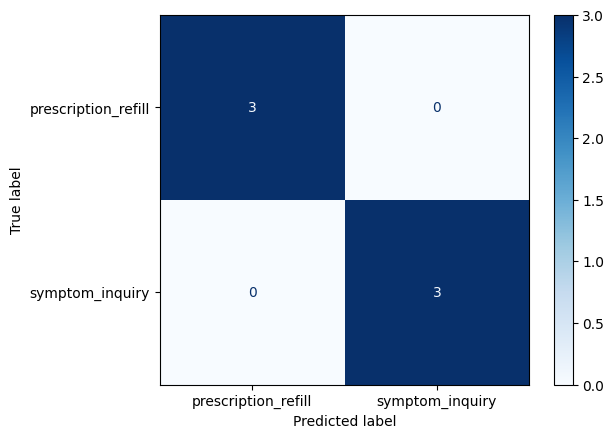

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true and predicted labels as numpy arrays
true_labels = query_labels.numpy()
pred_labels = preds.numpy()

# Only consider labels present in this batch
unique_labels = np.unique(np.concatenate([true_labels, pred_labels]))

cm = confusion_matrix(true_labels, pred_labels, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[test_intents[i] for i in unique_labels])
disp.plot(cmap='Blues')


In [68]:
from sklearn.metrics import classification_report

# Get the unique labels in this batch
unique_labels = np.unique(np.concatenate([true_labels, pred_labels]))

# Select the corresponding target names
target_names = [test_intents[i] for i in unique_labels]

# Generate the classification report
report = classification_report(true_labels, pred_labels,
                               labels=unique_labels,
                               target_names=target_names)
print(report)


                     precision    recall  f1-score   support

prescription_refill       1.00      1.00      1.00         3
    symptom_inquiry       1.00      1.00      1.00         3

           accuracy                           1.00         6
          macro avg       1.00      1.00      1.00         6
       weighted avg       1.00      1.00      1.00         6



## Model Evaluation

In [73]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['intent'])

test_embeddings = np.array(list(test_df['embedding'].values.tolist()))

test_embeddings = torch.tensor(test_embeddings, dtype=torch.float32)

label_mapping = {old: new for new, old in enumerate(sorted(df['intent'].unique()))}
test_labels = test_df['intent'].map(label_mapping).values
test_labels = torch.tensor(test_labels, dtype=torch.long)

intent_names = [k for k, v in sorted(label_mapping.items(), key=lambda x: x[1])]


✅ Overall Accuracy: 100.00%

📊 Classification Report:
                     precision    recall  f1-score   support

appointment_booking       1.00      1.00      1.00         6
      balance_check       1.00      1.00      1.00         5
     flight_booking       1.00      1.00      1.00         6
     order_tracking       1.00      1.00      1.00         6

           accuracy                           1.00        23
          macro avg       1.00      1.00      1.00        23
       weighted avg       1.00      1.00      1.00        23



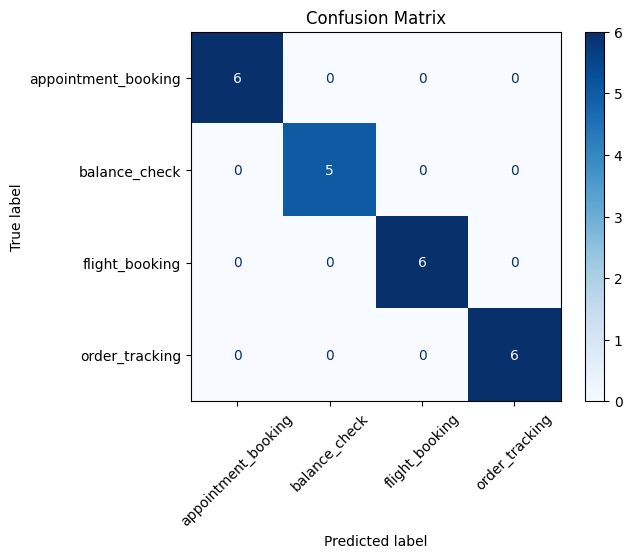

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torch

# Initialize lists to store results
all_true_labels = []
all_pred_labels = []

support_examples = 2  # number of support examples per intent

# Iterate over each intent in the test dataset
for intent in test_df['intent'].unique():
    intent_df = test_df[test_df['intent'] == intent]
    n_support = min(len(intent_df), support_examples)

    support = intent_df.sample(n=n_support)
    query = intent_df.drop(support.index)

    if len(query) == 0:
        continue

    # Embeddings
    support_x = torch.tensor(np.array(list(support['embedding'].values.tolist())), dtype=torch.float32)
    query_x   = torch.tensor(np.array(list(query['embedding'].values.tolist())), dtype=torch.float32)

    # Remap labels for this batch
    unique_labels = np.unique(np.concatenate([support['intent'].values, query['intent'].values]))
    label_map = {old:i for i, old in enumerate(unique_labels)}

    support_y = torch.tensor([label_map[i] for i in support['intent']], dtype=torch.long)
    query_y   = torch.tensor([label_map[i] for i in query['intent']], dtype=torch.long)

    # Adapt and predict
    acc, preds = adapt_and_predict(meta_model, support_x, support_y, query_x, query_y)

    # Convert predictions back to original label space
    preds_orig = [unique_labels[p] for p in preds.numpy()]
    query_orig = [unique_labels[t] for t in query_y.numpy()]

    all_pred_labels.extend(preds_orig)
    all_true_labels.extend(query_orig)

# Overall accuracy
overall_acc = np.mean(np.array(all_pred_labels) == np.array(all_true_labels))
print(f"✅ Overall Accuracy: {overall_acc*100:.2f}%\n")

# Classification Report
report = classification_report(all_true_labels, all_pred_labels)
print("📊 Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(all_true_labels, all_pred_labels, labels=np.unique(all_true_labels))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_true_labels))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [83]:
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def global_maml_evaluation(meta_model, meta_tasks, embeddings, label_mapping):
    all_true_labels = []
    all_pred_labels = []

    for task in meta_tasks:
        support_x, support_y, query_x, query_y = [], [], [], []

        for idx, (intent, support, query) in enumerate(task['data']):
            # Make sure indices exist in embeddings
            support_x.extend([embeddings[i] for i in support.index if i in embeddings])
            support_y.extend([idx]*len(support))
            query_x.extend([embeddings[i] for i in query.index if i in embeddings])
            query_y.extend([idx]*len(query))

        if len(support_x) == 0 or len(query_x) == 0:
            continue

        # Convert to tensors
        support_x = torch.tensor(support_x, dtype=torch.float32)
        support_y = torch.tensor(support_y, dtype=torch.long)
        query_x = torch.tensor(query_x, dtype=torch.float32)
        query_y = torch.tensor(query_y, dtype=torch.long)

        # Adapt and predict
        acc, preds = adapt_and_predict(meta_model, support_x, support_y, query_x, query_y)

        # Store for global metrics
        all_true_labels.extend(query_y.numpy())
        all_pred_labels.extend(preds.numpy())

    # If no predictions collected
    if len(all_true_labels) == 0:
        print("⚠️ No valid predictions collected. Check your embeddings and task generation.")
        return

    # Classification report
    report = classification_report(all_true_labels, all_pred_labels, zero_division=0)
    print("📊 Global Classification Report:\n")
    print(report)

    # Confusion matrix
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', xticks_rotation='vertical')


📊 Global Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



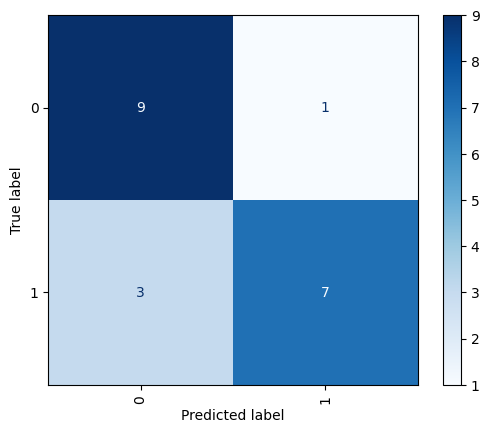

In [84]:
global_maml_evaluation(meta_model, meta_tasks, embeddings, label_mapping)


In [85]:
import torch

torch.save(meta_model.state_dict(), "maml_meta_model.pth")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [87]:
from google.colab import files

files.download("maml_meta_model.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>